<a href="https://colab.research.google.com/github/Ujjwal-Modi/Global-AI-Job-Market-Trends-Salary-Insights-2025/blob/main/EDA_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv("ai_job_dataset.csv")

In [3]:
df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [4]:
df.duplicated().sum() #no duplicates

np.int64(0)

In [5]:
#fix the posting_date ,application_deadline types to dates
df["posting_date"] = pd.to_datetime(df["posting_date"])
df["application_deadline"] = pd.to_datetime(df["application_deadline"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

# Visualization 1

In [7]:
df.describe()

,salary_usd,remote_ratio,years_experience,posting_date,application_deadline,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000,15000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,2024-08-29 08:48:51.840000,2024-10-11 21:55:23.520000,1503.314733,7.504273
min,32519.000000,0.000000,0.000000,2024-01-01 00:00:00,2024-01-16 00:00:00,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,2024-04-29 00:00:00,2024-06-13 00:00:00,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,2024-08-28 00:00:00,2024-10-12 00:00:00,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2024-12-29 00:00:00,2025-02-10 00:00:00,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2025-04-30 00:00:00,2025-07-11 00:00:00,2499.000000,10.000000
std,60260.940438,40.812712,5.545768,NaN,NaN,576.127083,1.450870


In [8]:
df.describe(include="O")

,job_id,job_title,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,required_skills,education_required,industry,company_name
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,15000,20,3,4,4,20,3,20,13663,4,15,16
top,AI15000,Machine Learning Researcher,USD,MI,FT,Germany,S,Sweden,"Python, TensorFlow, PyTorch",Bachelor,Retail,TechCorp Inc
freq,1,808,11957,3781,3812,814,5007,790,17,3789,1063,980


top job title is Machine Learning Researcher

top employment type is FT - Full Time

top company size is S - Small

top experience level is Ml - Mid level

top salary currency is USD

top education required is Bachelor

top industry worked on is Retail

top employee residence is Sweden


Lets Visualize the numericals outliers

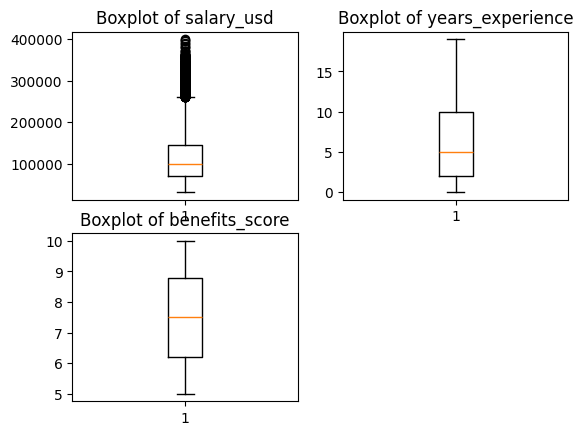

In [9]:
num_cols=["salary_usd","years_experience","benefits_score"]

for i,col in enumerate (num_cols,1):
    plt.subplot(2,2,i)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.show()

 outliers in salary_usd |
 use the iqr to clip the outliers in salary_usd column

{'whiskers': [<matplotlib.lines.Line2D at 0x7c9e65c34f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7c9e65c35520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c9e65c34c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7c9e65c35ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c9e65c35dc0>],
 'means': []}

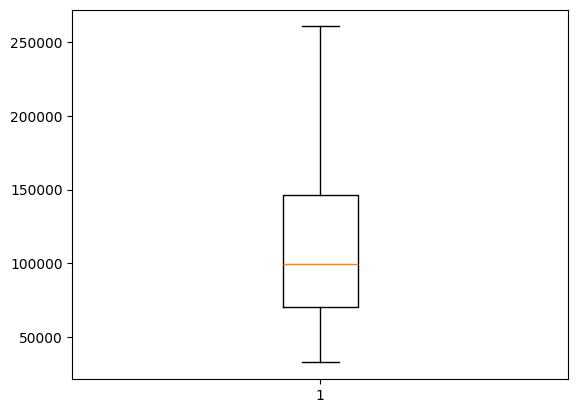

In [10]:
    Q1 = df["salary_usd"].quantile(0.25)
    Q3 = df["salary_usd"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df["salary_usd"] = df["salary_usd"].clip(lower=lower_bound, upper=upper_bound)

    plt.boxplot(df["salary_usd"])

Insights

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'AI Research Scientist'),
  Text(1, 0, 'AI Software Engineer'),
  Text(2, 0, 'AI Specialist'),
  Text(3, 0, 'NLP Engineer'),
  Text(4, 0, 'AI Consultant'),
  Text(5, 0, 'AI Architect'),
  Text(6, 0, 'Principal Data Scientist'),
  Text(7, 0, 'Data Analyst'),
  Text(8, 0, 'Autonomous Systems Engineer'),
  Text(9, 0, 'AI Product Manager'),
  Text(10, 0, 'Machine Learning Engineer'),
  Text(11, 0, 'Data Engineer'),
  Text(12, 0, 'Research Scientist'),
  Text(13, 0, 'ML Ops Engineer'),
  Text(14, 0, 'Robotics Engineer'),
  Text(15, 0, 'Head of AI'),
  Text(16, 0, 'Deep Learning Engineer'),
  Text(17, 0, 'Data Scientist'),
  Text(18, 0, 'Machine Learning Researcher'),
  Text(19, 0, 'Computer Vision Engineer')])

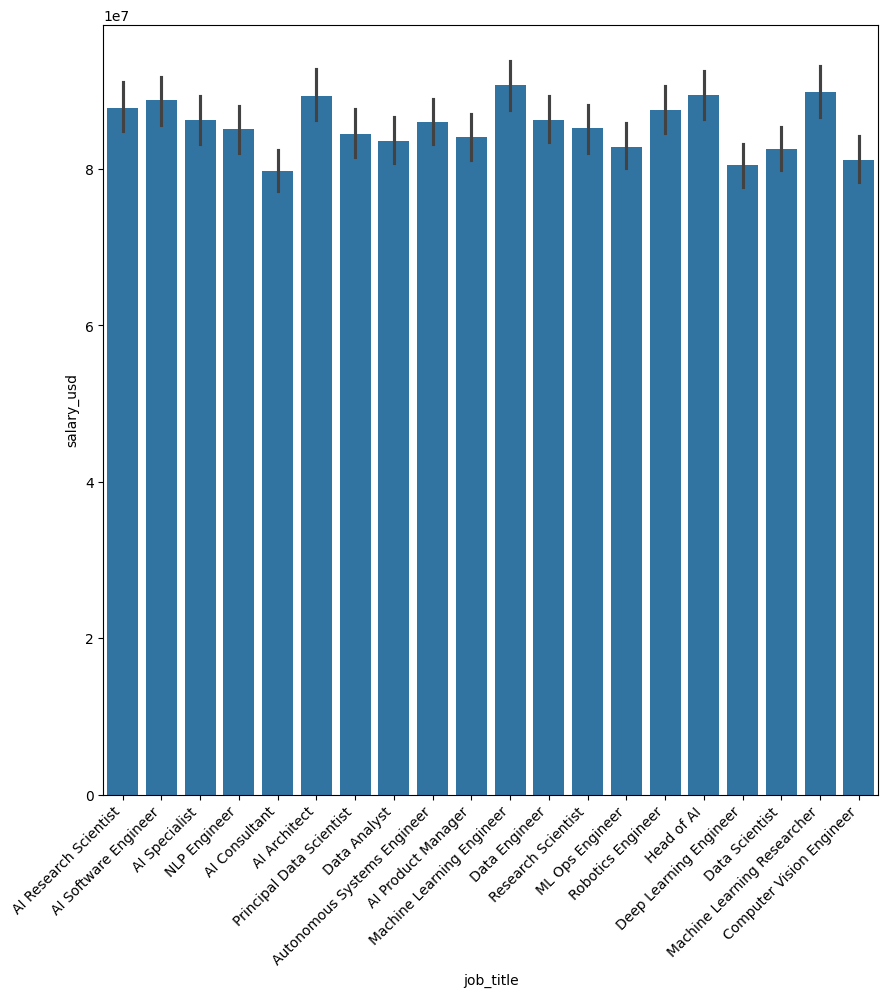

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x="job_title",y="salary_usd",estimator=sum)
plt.xticks(rotation=45,ha='right')

The Highest salaries is in Machine Learning Engineer job and the lowest is in AI Consultant

/tmp/ipython-input-722175663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary, x="experience_level", y="salary_usd", palette="Blues_d")


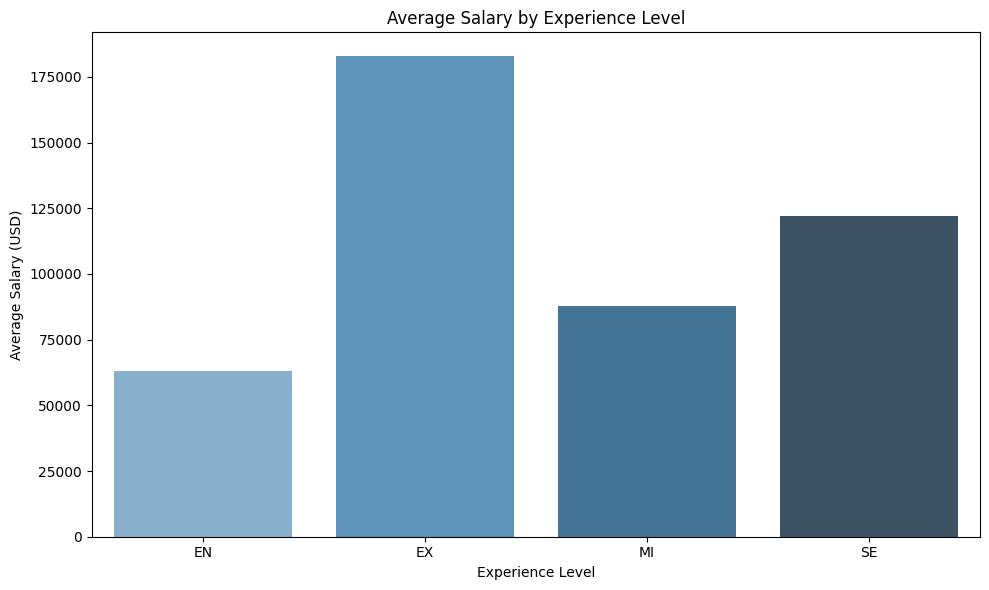

In [12]:
avg_salary = df.groupby("experience_level", as_index=False)["salary_usd"].mean()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_salary, x="experience_level", y="salary_usd", palette="Blues_d")

plt.title("Average Salary by Experience Level")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Experience Level")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-672005957.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=remote_job, x="job_title", y="remote_ratio", palette="viridis")


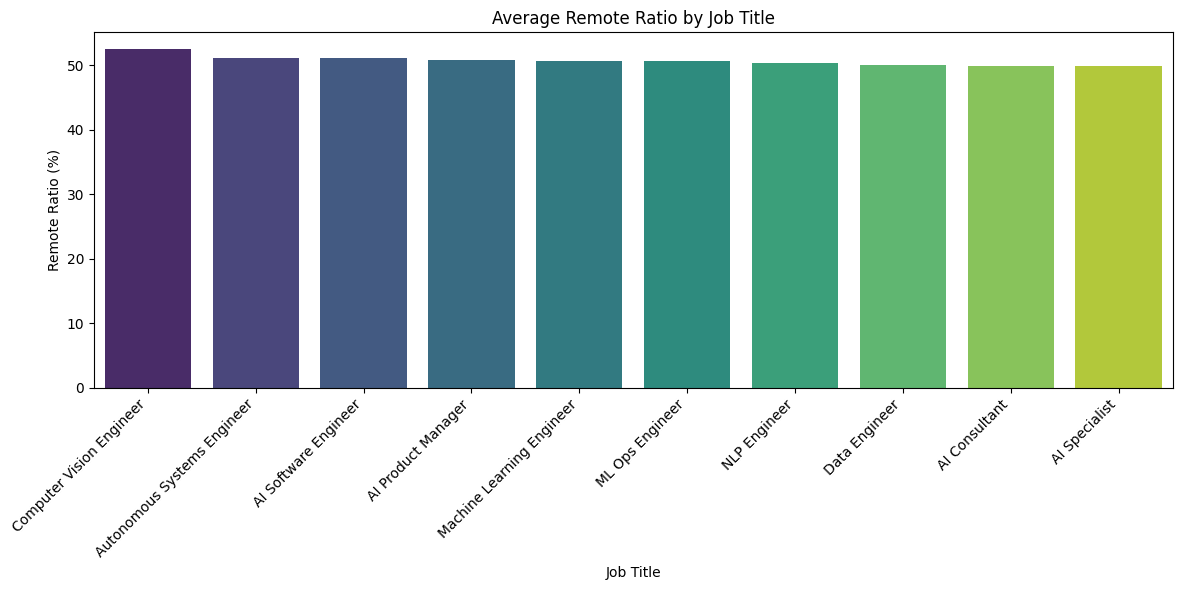

In [13]:
remote_job = df.groupby("job_title", as_index=False)["remote_ratio"].mean()

remote_job = remote_job.sort_values("remote_ratio", ascending=False).head(10)


plt.figure(figsize=(12,6))
sns.barplot(data=remote_job, x="job_title", y="remote_ratio", palette="viridis")


plt.title("Average Remote Ratio by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Remote Ratio (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

remote ratio for the jobs is nearly the same but Computer vision is the highest

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Retail'),
  Text(1, 0, 'Media'),
  Text(2, 0, 'Consulting'),
  Text(3, 0, 'Technology'),
  Text(4, 0, 'Real Estate'),
  Text(5, 0, 'Automotive'),
  Text(6, 0, 'Government'),
  Text(7, 0, 'Telecommunications'),
  Text(8, 0, 'Transportation'),
  Text(9, 0, 'Healthcare'),
  Text(10, 0, 'Finance'),
  Text(11, 0, 'Energy'),
  Text(12, 0, 'Manufacturing'),
  Text(13, 0, 'Education'),
  Text(14, 0, 'Gaming')])

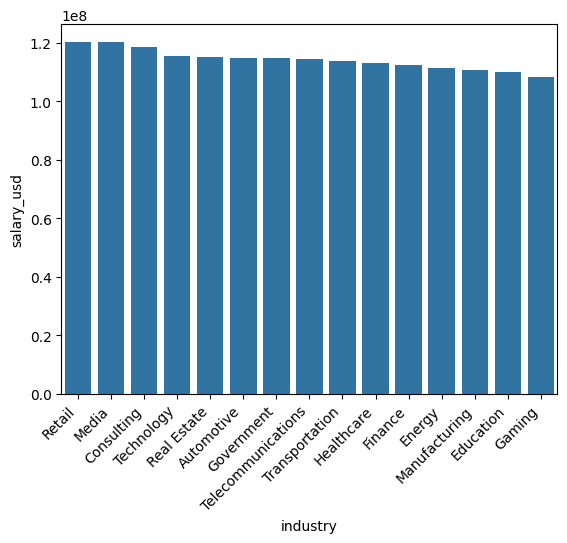

In [14]:
top_salary_industry = df.groupby("industry", as_index=False)["salary_usd"].sum()
top_salary_industry = top_salary_industry.sort_values("salary_usd", ascending=False)
sns.barplot(data=top_salary_industry,x="industry",y="salary_usd",estimator=sum)
plt.xticks(rotation=45,ha='right')

Media,Retail are the industries with highest salaries

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Machine Learning Researcher'),
  Text(1, 0, 'AI Software Engineer'),
  Text(2, 0, 'Autonomous Systems Engineer'),
  Text(3, 0, 'Head of AI'),
  Text(4, 0, 'Data Analyst'),
  Text(5, 0, 'AI Architect'),
  Text(6, 0, 'Machine Learning Engineer'),
  Text(7, 0, 'NLP Engineer'),
  Text(8, 0, 'Robotics Engineer'),
  Text(9, 0, 'Data Engineer'),
  Text(10, 0, 'AI Research Scientist'),
  Text(11, 0, 'AI Product Manager'),
  Text(12, 0, 'Research Scientist'),
  Text(13, 0, 'Principal Data Scientist'),
  Text(14, 0, 'AI Specialist'),
  Text(15, 0, 'Computer Vision Engineer'),
  Text(16, 0, 'ML Ops Engineer'),
  Text(17, 0, 'Deep Learning Engineer'),
  Text(18, 0, 'Data Scientist'),
  Text(19, 0, 'AI Consultant')])

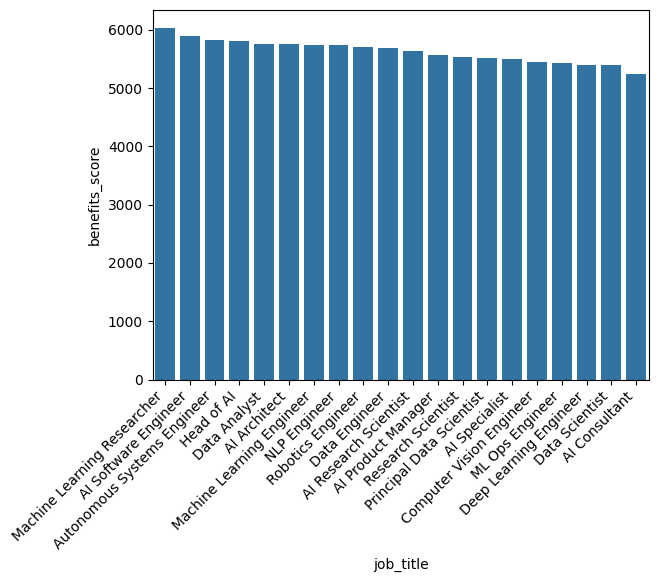

In [15]:
top_benefit_jobs = df.groupby("job_title", as_index=False)["benefits_score"].sum()
top_benefit_jobs = top_benefit_jobs.sort_values("benefits_score", ascending=False)
sns.barplot(data=top_benefit_jobs,x="job_title",y="benefits_score")
plt.xticks(rotation=45,ha='right')

Machine Learning Research is the job with the biggest benefit score

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'TechCorp Inc'),
  Text(1, 0, 'Cognitive Computing'),
  Text(2, 0, 'AI Innovations'),
  Text(3, 0, 'Digital Transformation LLC'),
  Text(4, 0, 'Future Systems'),
  Text(5, 0, 'Quantum Computing Inc'),
  Text(6, 0, 'Cloud AI Solutions'),
  Text(7, 0, 'Predictive Systems'),
  Text(8, 0, 'Smart Analytics'),
  Text(9, 0, 'Autonomous Tech'),
  Text(10, 0, 'Advanced Robotics'),
  Text(11, 0, 'Neural Networks Co'),
  Text(12, 0, 'Machine Intelligence Group'),
  Text(13, 0, 'DeepTech Ventures'),
  Text(14, 0, 'Algorithmic Solutions'),
  Text(15, 0, 'DataVision Ltd')])

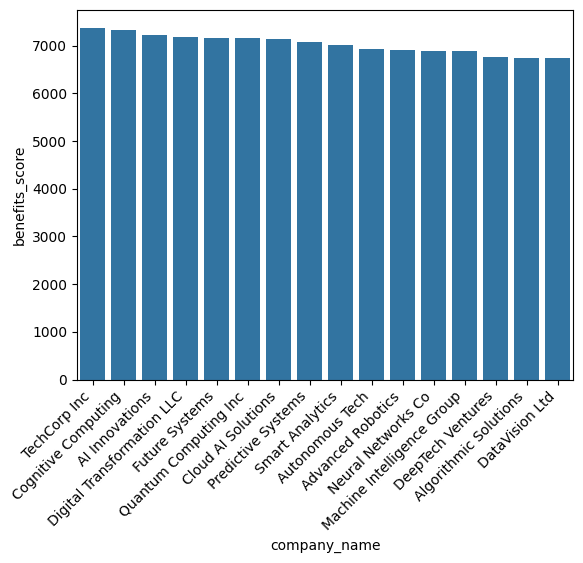

In [16]:
top_benefit_companies = df.groupby("company_name", as_index=False)["benefits_score"].sum()
top_benefit_companies = top_benefit_companies.sort_values("benefits_score", ascending=False)

sns.barplot(data=top_benefit_companies,x="company_name",y="benefits_score",estimator=sum)
plt.xticks(rotation=45,ha='right')

TechCorp inc,cognitive computing the companies with the top benifits

In [17]:
# Group by job_title and job_description, then count frequency
job_desc_counts = df.groupby(["job_title", "required_skills"]).size().reset_index(name="count")

# For each job_title, get the row with the max count
most_frequent_desc = job_desc_counts.loc[job_desc_counts.groupby("job_title")["count"].idxmax()]
most_frequent_desc

,job_title,required_skills,count
234,AI Architect,"Hadoop, MLOps, Git",2
975,AI Consultant,"Hadoop, Docker, MLOps",2
2085,AI Product Manager,"Scala, PyTorch, Computer Vision",2
2269,AI Research Scientist,"Computer Vision, Kubernetes, Python",2
3119,AI Software Engineer,"GCP, Python, Mathematics",2
3799,AI Specialist,"Computer Vision, Scala, AWS",2
4925,Autonomous Systems Engineer,"Python, Data Visualization, Azure",2
5722,Computer Vision Engineer,"Python, TensorFlow, PyTorch",4
6491,Data Analyst,"Python, TensorFlow, Data Visualization",3
6961,Data Engineer,"Kubernetes, Linux, Python",3


most frequent required skills for every job title

([0, 1, 2], [Text(0, 0, 'USD'), Text(1, 0, 'EUR'), Text(2, 0, 'GBP')])

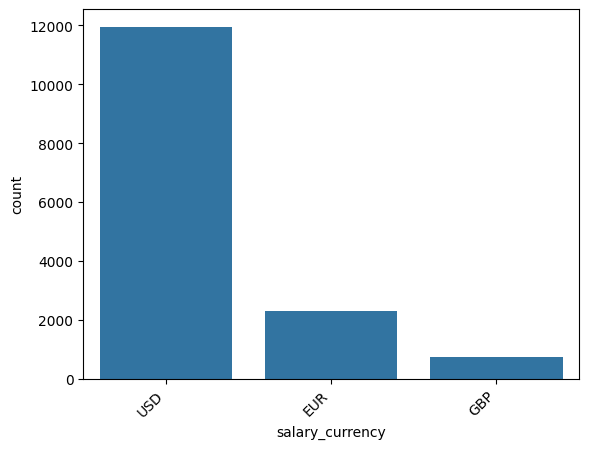

In [18]:
sns.countplot(data=df,x="salary_currency")
plt.xticks(rotation=45,ha='right')

USD is the highest currency and GBP- Great British Pound is the least

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Cognitive Computing'),
  Text(1, 0, 'Digital Transformation LLC'),
  Text(2, 0, 'TechCorp Inc'),
  Text(3, 0, 'Smart Analytics'),
  Text(4, 0, 'Machine Intelligence Group'),
  Text(5, 0, 'DataVision Ltd'),
  Text(6, 0, 'DeepTech Ventures'),
  Text(7, 0, 'Future Systems'),
  Text(8, 0, 'Cloud AI Solutions'),
  Text(9, 0, 'Autonomous Tech'),
  Text(10, 0, 'Neural Networks Co'),
  Text(11, 0, 'Quantum Computing Inc'),
  Text(12, 0, 'Advanced Robotics'),
  Text(13, 0, 'AI Innovations'),
  Text(14, 0, 'Predictive Systems'),
  Text(15, 0, 'Algorithmic Solutions')])

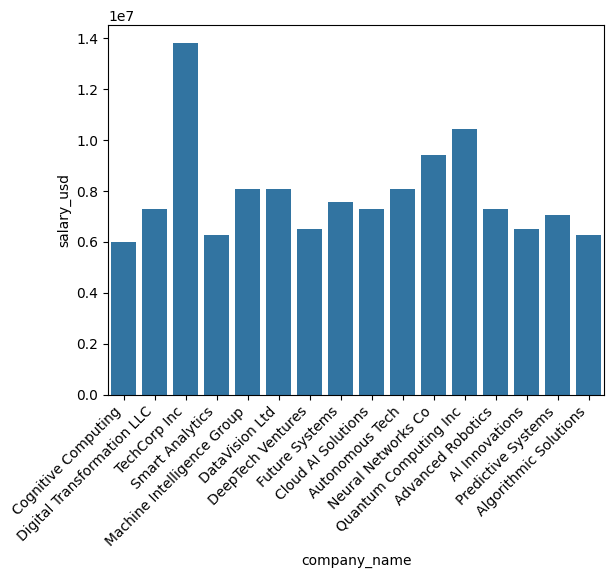

In [19]:
maxi=df["salary_usd"].max()
highest_salaries_in_usd=df[df["salary_usd"]==maxi]
sns.barplot(data=highest_salaries_in_usd,x="company_name",y="salary_usd",estimator=sum)
plt.xticks(rotation=45,ha='right')


we got the highest salaries from data and get the top company that got the most high salaries which is TechCorp inc

In [20]:
low=df["salary_usd"].min()
lowest_salaries_in_usd=df[df["salary_usd"]==low]
lowest_salaries_in_usd

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
9549,AI09550,Computer Vision Engineer,32519.0,USD,EN,FT,India,S,India,100,"Scala, Python, Computer Vision, Linux",Master,0,Energy,2025-03-27,2025-04-23,935,6.5,Algorithmic Solutions


the lowest salary in data is from Algorithmic Solutions company


Adding features

In [21]:
df["Days_to_deadline"]=df["application_deadline"]-df["posting_date"]

calc the remaing days to deadline

In [22]:
average_salary_per_CE=df.pivot_table(index=["company_size","employment_type"],values="salary_usd",aggfunc=["mean","max","min"])
average_salary_per_CE

mean         max        min
                                 salary_usd  salary_usd salary_usd
company_size employment_type                                      
L            CT               127476.962807  260751.625    41438.0
             FL               129351.990020  260751.625    42185.0
             FT               128772.454796  260751.625    41591.0
             PT               126221.361503  260751.625    41634.0
M            CT               114685.280183  260751.625    36152.0
             FL               110454.609852  260751.625    36071.0
             FT               113339.298152  260751.625    36066.0
             PT               111732.371860  260751.625    36155.0
S            CT               102121.736231  260751.625    33117.0
             FL               101520.058440  260751.625    32587.0
             FT               103072.678287  260751.625    32519.0
             PT               100752.045685  260751.625    32542.0

the average and max and min for every company size with every employment type

In [23]:
modey=df.groupby("job_title")["experience_level"].agg(lambda x:x.mode()[0])
JE_mode = modey.reset_index().pivot_table(
    index="job_title",
    values="experience_level",
    aggfunc=lambda x: x
)
JE_mode

,experience_level
job_title,
AI Architect,MI
AI Consultant,MI
AI Product Manager,EN
AI Research Scientist,EX
AI Software Engineer,MI
AI Specialist,EX
Autonomous Systems Engineer,SE
Computer Vision Engineer,MI
Data Analyst,EN


most frequent experience level in every job

In [24]:
maxi=df["salary_usd"].max()
highest_salaries_in_usd=df[df["salary_usd"]==maxi]
highest_salaries_in_usd

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,Days_to_deadline
48,AI00049,AI Specialist,260751.625,USD,EX,PT,Switzerland,S,Switzerland,0,"Deep Learning, Git, Data Visualization, Linux,...",Bachelor,12,Manufacturing,2024-08-08,2024-09-23,1930,7.2,Cognitive Computing,46 days
67,AI00068,Machine Learning Engineer,260751.625,USD,EX,PT,Denmark,M,Canada,0,"Python, Scala, Statistics, Git",Associate,12,Finance,2025-02-09,2025-02-23,2452,7.0,Digital Transformation LLC,14 days
79,AI00080,AI Research Scientist,260751.625,USD,EX,CT,United States,M,United States,0,"PyTorch, Linux, SQL",Master,12,Consulting,2025-02-13,2025-03-10,2231,7.0,TechCorp Inc,25 days
98,AI00099,Machine Learning Researcher,260751.625,USD,EX,CT,Switzerland,L,Denmark,50,"Python, AWS, Kubernetes, Deep Learning",Master,12,Retail,2025-01-12,2025-03-07,1137,5.6,Smart Analytics,54 days
137,AI00138,Machine Learning Engineer,260751.625,USD,EX,FT,Denmark,L,Denmark,100,"Hadoop, Python, Git, TensorFlow",PhD,11,Telecommunications,2024-11-06,2024-11-24,1209,7.3,Machine Intelligence Group,18 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,AI14917,Principal Data Scientist,260751.625,USD,EX,CT,United States,L,United States,0,"SQL, Hadoop, Docker, Statistics",PhD,14,Energy,2025-04-09,2025-05-23,1773,8.8,DataVision Ltd,44 days
14917,AI14918,ML Ops Engineer,260751.625,USD,EX,FT,Norway,L,Norway,50,"TensorFlow, GCP, AWS, MLOps",PhD,11,Healthcare,2024-03-12,2024-04-07,500,6.0,Cognitive Computing,26 days
14956,AI14957,Machine Learning Engineer,260751.625,USD,EX,PT,Denmark,L,Germany,50,"Hadoop, SQL, Docker, Computer Vision",Master,19,Retail,2024-08-30,2024-10-23,728,8.7,Future Systems,54 days
14977,AI14978,Research Scientist,260751.625,USD,EX,CT,Norway,M,Israel,100,"Python, Spark, MLOps, Computer Vision, Deep Le...",Associate,10,Technology,2024-07-17,2024-09-13,1514,9.8,Quantum Computing Inc,58 days


highest salaries in usd

# Visualization 2

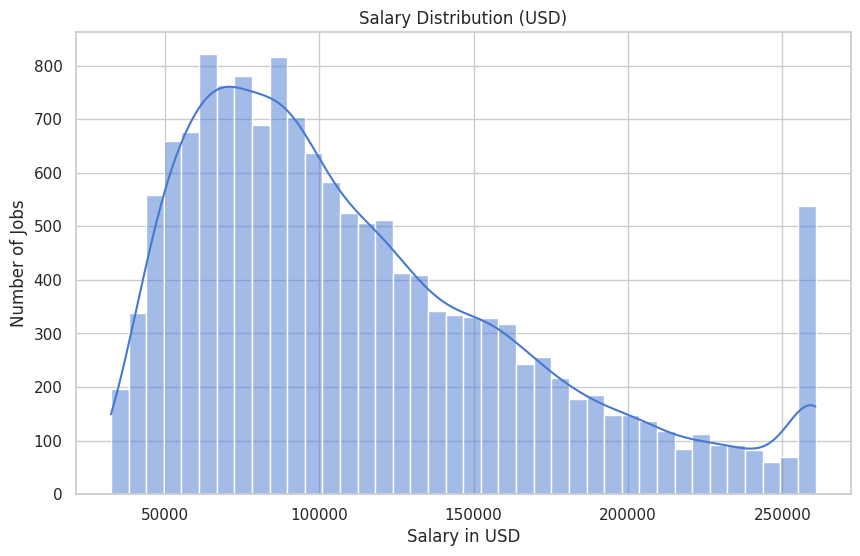

In [25]:
# Set style
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and set your dataset path if not already loaded

# 1. Salary Distribution
sns.histplot(df['salary_usd'], bins=40, kde=True)
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Number of Jobs')
plt.show()

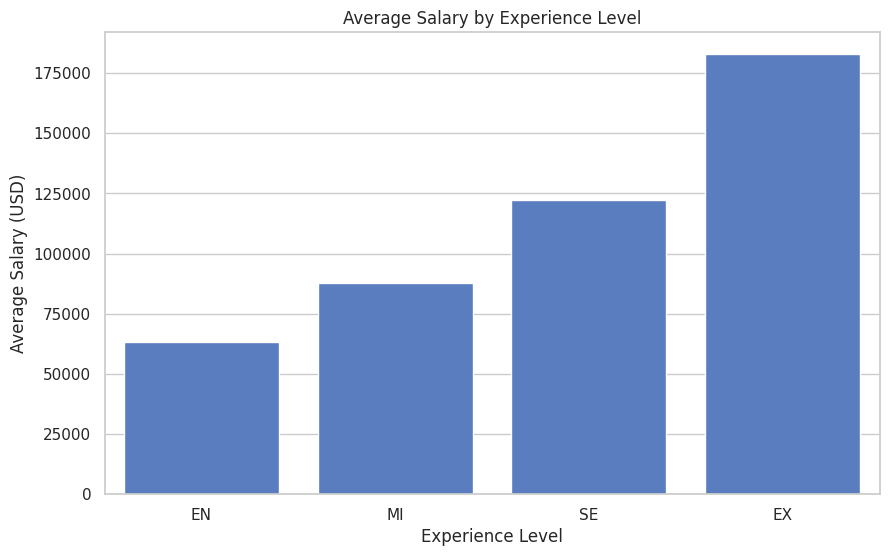

In [26]:
# 2. Average Salary by Experience Level
exp_salary = df.groupby('experience_level')['salary_usd'].mean().sort_values()
sns.barplot(x=exp_salary.index, y=exp_salary.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

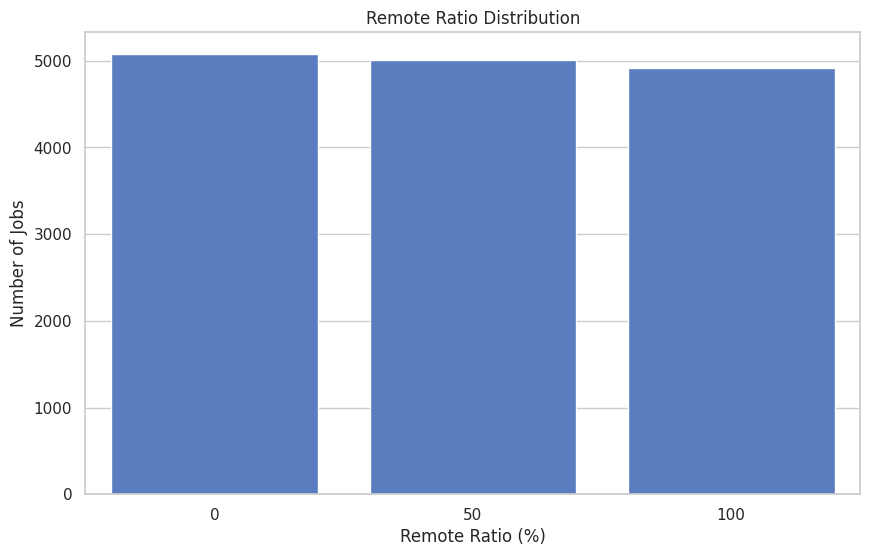

In [27]:
# 3. Remote Ratio Distribution
sns.countplot(data=df, x='remote_ratio')
plt.title('Remote Ratio Distribution')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Number of Jobs')
plt.show()

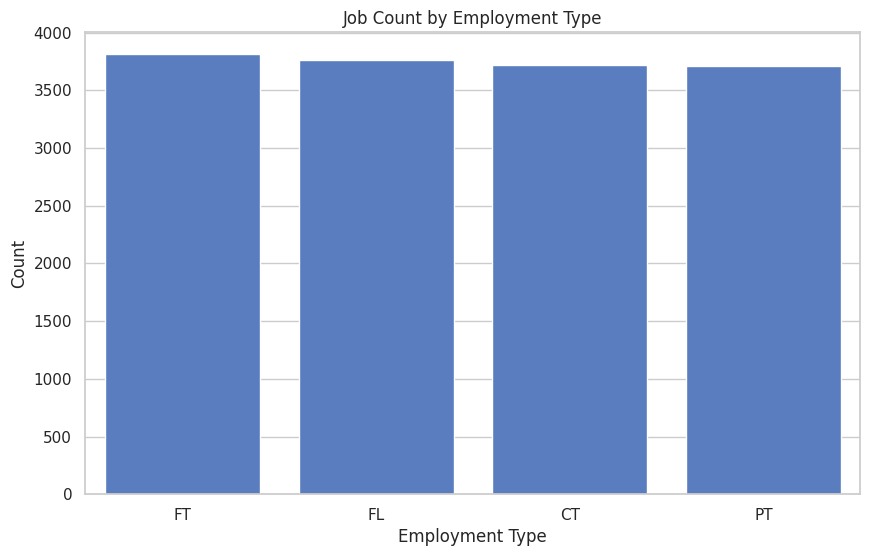

In [28]:
# 4. Job Count by Employment Type
sns.countplot(data=df, x='employment_type', order=df['employment_type'].value_counts().index)
plt.title('Job Count by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

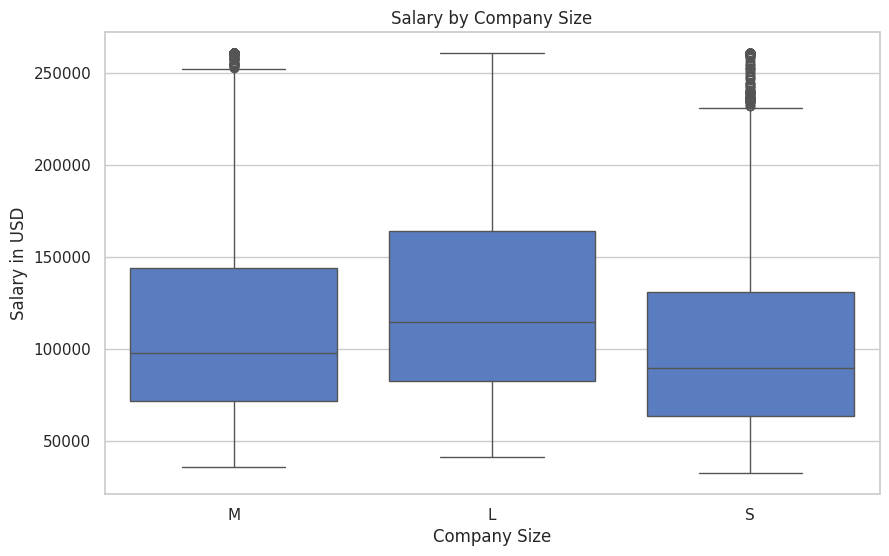

In [29]:
# 5. Salary by Company Size
sns.boxplot(data=df, x='company_size', y='salary_usd')
plt.title('Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

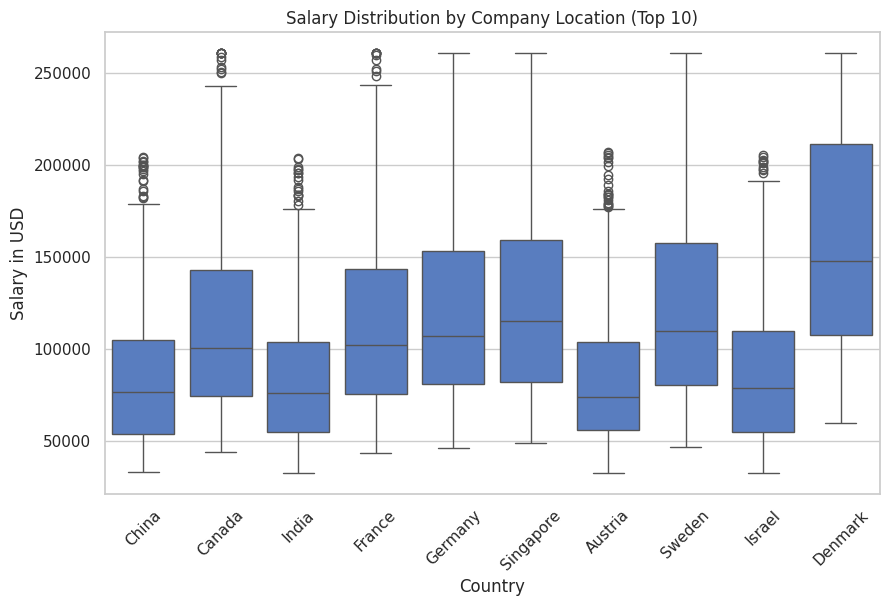

In [30]:

# 6. Salary by Country (Top 10 countries)
top_countries = df['company_location'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['company_location'].isin(top_countries)],
            x='company_location', y='salary_usd')
plt.title('Salary Distribution by Company Location (Top 10)')
plt.xlabel('Country')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()

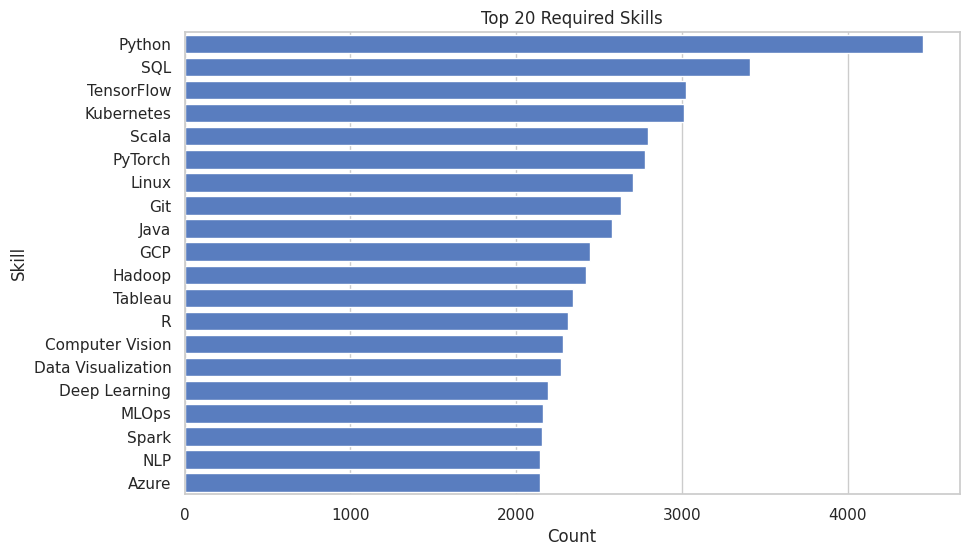

In [31]:
# 7. Popular Required Skills (Top 20)
from collections import Counter

# Flatten and count skills
skill_counter = Counter()
df['required_skills'].dropna().apply(lambda x: skill_counter.update(x.split(', ')))
common_skills = pd.DataFrame(skill_counter.most_common(20), columns=['Skill', 'Count'])

sns.barplot(data=common_skills, y='Skill', x='Count')
plt.title('Top 20 Required Skills')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

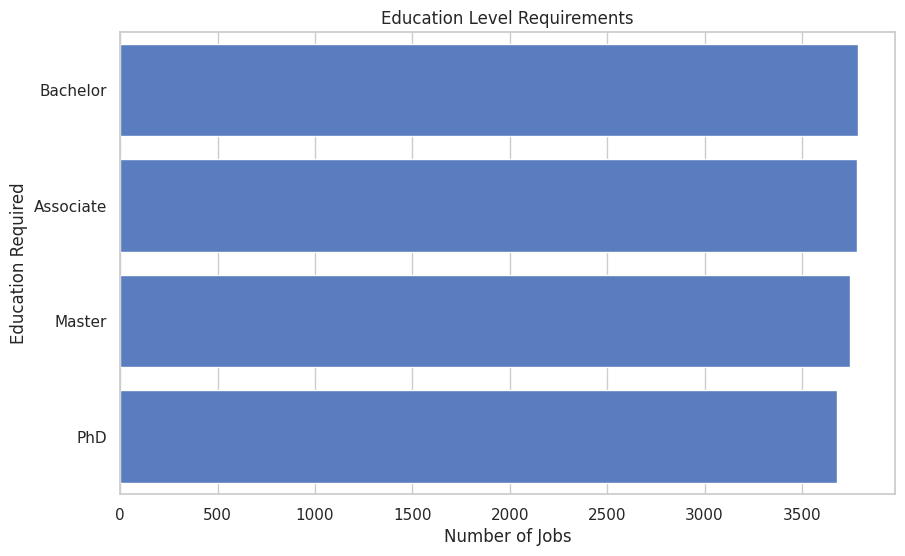

In [32]:
# 8. Education Level Requirement Count
sns.countplot(data=df, y='education_required', order=df['education_required'].value_counts().index)
plt.title('Education Level Requirements')
plt.xlabel('Number of Jobs')
plt.ylabel('Education Required')
plt.show()

/tmp/ipython-input-2505239265.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_postings = df.resample('M', on='posting_date')['job_id'].count()


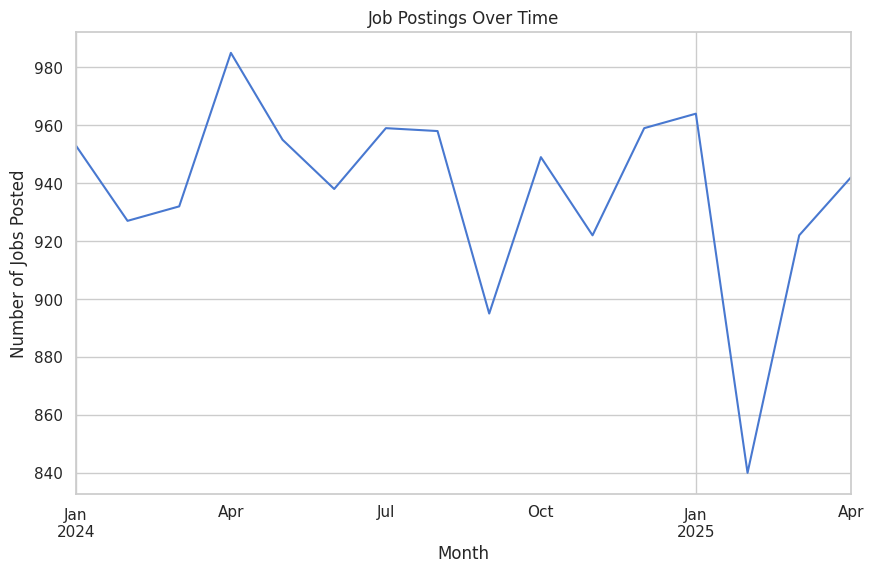

In [33]:
# 9. Job Posting Trends Over Time
df['posting_date'] = pd.to_datetime(df['posting_date'])
monthly_postings = df.resample('M', on='posting_date')['job_id'].count()

monthly_postings.plot()
plt.title('Job Postings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Jobs Posted')
plt.grid(True)
plt.show()

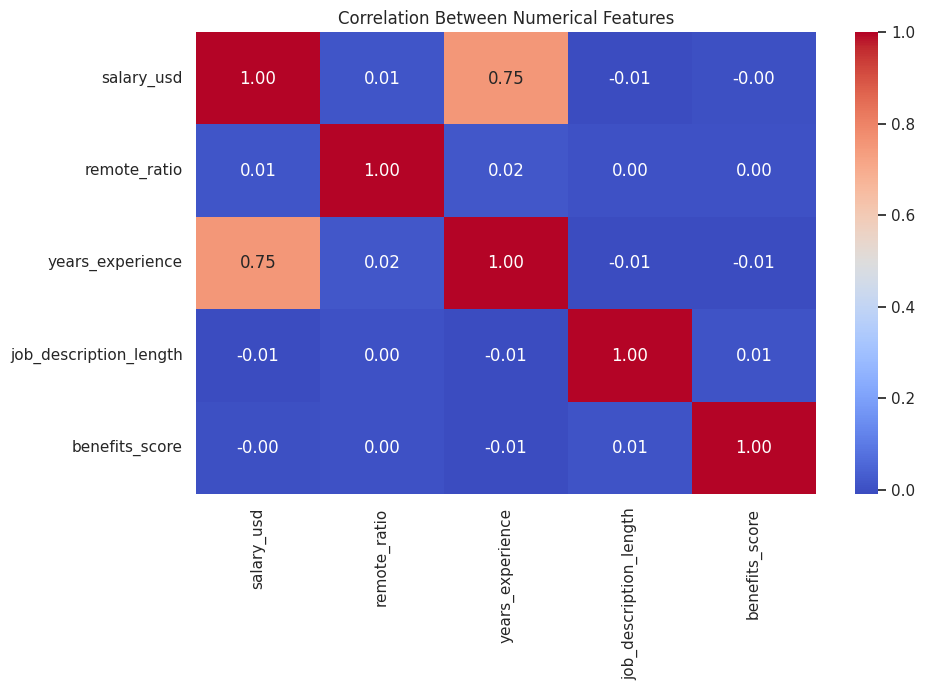

In [34]:
# 10. Correlation Heatmap
numerical_cols = ['salary_usd', 'remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()